# Predict Bike Sharing Demand with AutoGluon

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
  Using cached setuptools-69.0.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
Using cached setuptools-69.0.2-py3-none-any.whl (819 kB)
Using cached wheel-0.42.0-py3-none-any.whl (65 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.41.2
    Uninstalling wheel-0.41.2:
      Successfully uninstalled wheel-0.41.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.2.2
    Uninstalling setuptools-68.2.2:
      Successfully uninstalled setuptools-

In [3]:
!pip install kaggle

  Using cached kaggle-1.5.16-py3-none-any.whl


### Import libraries

In [2]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 

### Load data

In [3]:
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [7]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [8]:
# Columns that need to be dropped since they are not available in the evaluation set
train = train.drop(['casual', 'registered'], axis=1)

In [17]:
# Exclude datetime from the training and test set but keep them for data exploration analysis
train_ml = train.drop('datetime', axis=1)
test_ml = test.drop('datetime', axis=1)

In [18]:
predictor = TabularPredictor(label='count', problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train_ml,
    time_limit=300,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20231210_184232"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 300 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20231210_184232/ds_sub_fit/sub_fit_ho.
2023-12-10 18:42:32,699	INFO util.py:159 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Beginning Aut

### Review AutoGluon's training run with ranking of models that did the best.

In [19]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -140.813363  root_mean_squared_error       2.961351  179.642889                0.000819           0.456308            3       True          9
1     WeightedEnsemble_L2 -141.924392  root_mean_squared_error       1.463774  134.677568                0.000579           0.302042            2       True          7
2  RandomForestMSE_BAG_L2 -142.233974  root_mean_squared_error       2.960532  179.186581                0.707830          34.043775            2       True          8
3         CatBoost_BAG_L1 -144.258674  root_mean_squared_error       0.057988   47.711759                0.057988          47.711759            1       True          4
4  NeuralNetFastAI_BAG_L1 -146.399786  root_mean_squared_error       0.438039   81.376550         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -160.51746660830347,
  'KNeighborsDist_BAG_L1': -169.6546353414388,
  'RandomForestMSE_BAG_L1': -151.27300334096262,
  'CatBoost_BAG_L1': -144.2586738532502,
  'ExtraTreesMSE_BAG_L1': -149.63762311624268,
  'NeuralNetFastAI_BAG_L1': -146.39978614772326,
  'WeightedEnsemble_L2': -141.92439242978108,
  'RandomForestMSE_BAG_L2': -142.23397380562724,
  'WeightedEnsemble_L3': -140.8133627950546},
 'model_best': 'WeightedEnsemble_L3',
 'model_

### Create predictions from test dataset

In [20]:
predictions = predictor.predict(test_ml)
predictions.head()

0    122.419983
1     67.627457
2     67.627457
3     86.706909
4     86.706909
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [21]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      192.087906
std       109.912445
min        14.105837
25%       106.911972
50%       166.300385
75%       265.609650
max       614.842773
Name: count, dtype: float64

In [22]:
# How many negative values do we have?
sum(n < 0 for n in predictions.values.flatten())

0

In [23]:
# Set them to zero
predictions = predictions.apply(lambda x: max(0, x))

In [24]:
sum(n < 0 for n in predictions.values.flatten())

0

### Set predictions to submission dataframe, save, and submit

In [25]:
submission["count"] = predictions
submission.to_csv("submission-i2.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "second raw submission"

100%|█████████████████████████████████████████| 243k/243k [00:00<00:00, 512kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [27]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-12-10 18:49:39  second raw submission              complete  1.32965      1.32965       
submission_new_hpo.csv       2023-12-08 20:20:21  new features with hyperparameters  complete  1.2746       1.2746        
submission_new_hpo.csv       2023-12-07 16:48:17  new features with hyperparameters  complete  1.2746       1.2746        
submission.csv               2023-12-05 16:43:18  first raw submission               complete  1.32965      1.32965       


#### Initial score of  1.33

## Step 4: Exploratory Data Analysis and Creating additional features

In [28]:
#Exploring data frame
def data_overview(df, head=5):
    print(" SHAPE ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" HEAD ".center(125,'-'))
    print(df.head(3))
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)

In [29]:
data_overview(train)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:10886
Columns:10
------------------------------------------------------- MISSING VALUES ------------------------------------------------------
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64
----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------
0
------------------------------------------------------------ HEAD -----------------------------------------------------------
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.0

In [30]:
data_overview(test)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:6493
Columns:9
------------------------------------------------------- MISSING VALUES ------------------------------------------------------
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64
----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------
0
------------------------------------------------------------ HEAD -----------------------------------------------------------
              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   



array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

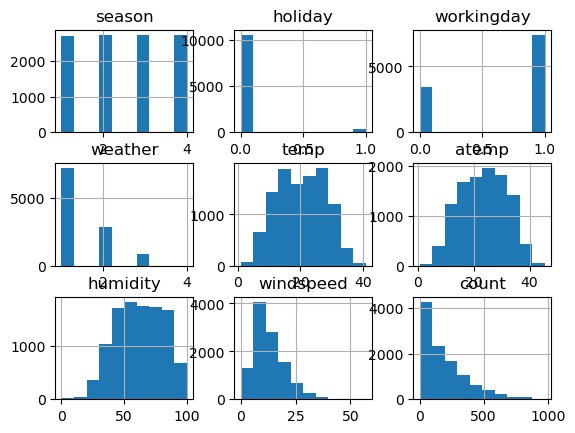

In [32]:
# Create a histogram of all features to show the distribution of each one relative to the data
train.hist()

In [9]:
# Convert the date to datetime format
train['datetime'] = pd.to_datetime(train['datetime'], format='ISO8601')
test['datetime'] = pd.to_datetime(test['datetime'], format='ISO8601')

# Extract month, day
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['day_of_week'] = train['datetime'].dt.day_name()

test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['day_of_week'] = test['datetime'].dt.day_name()

In [10]:
train = train.drop('datetime', axis=1)
test = test.drop('datetime', axis=1)

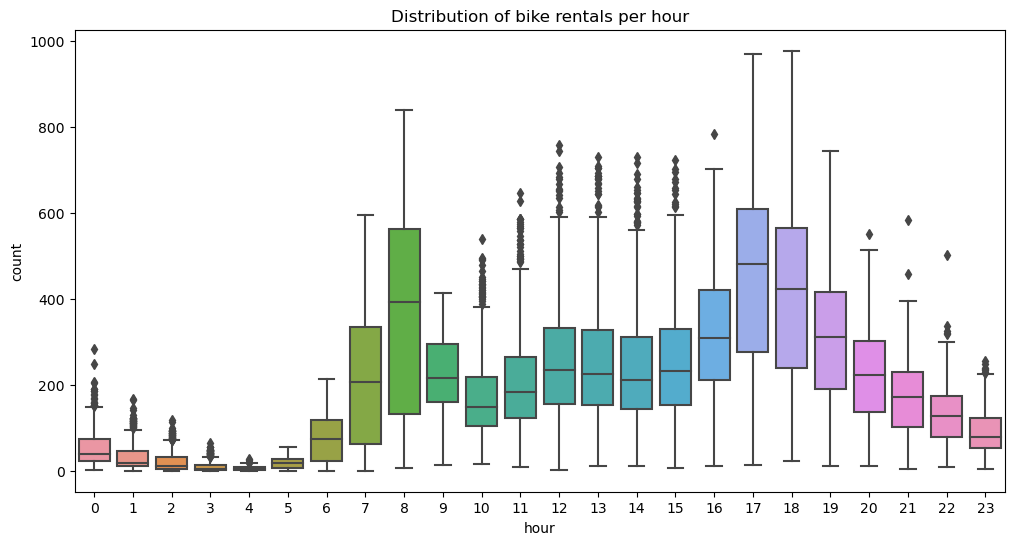

In [35]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hour', y='count', data=train)
plt.title('Distribution of bike rentals per hour')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Text(0.5, 1.0, 'Distribution of bike rentals per day of the week')

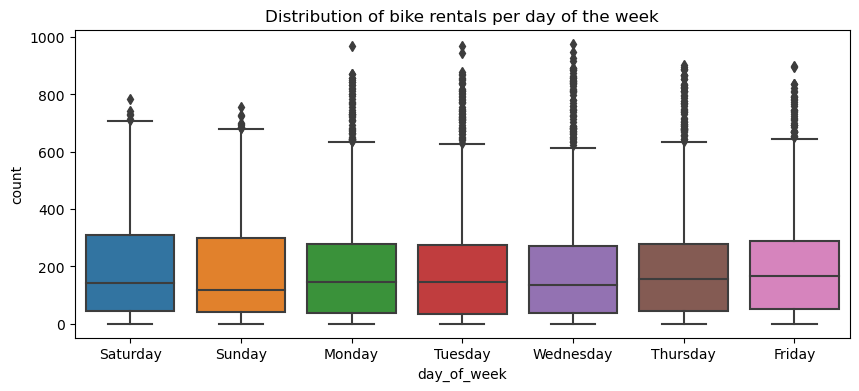

In [36]:
plt.figure(figsize=(10,4))
sns.boxplot(x='day_of_week', y='count', data=train)
plt.title('Distribution of bike rentals per day of the week')

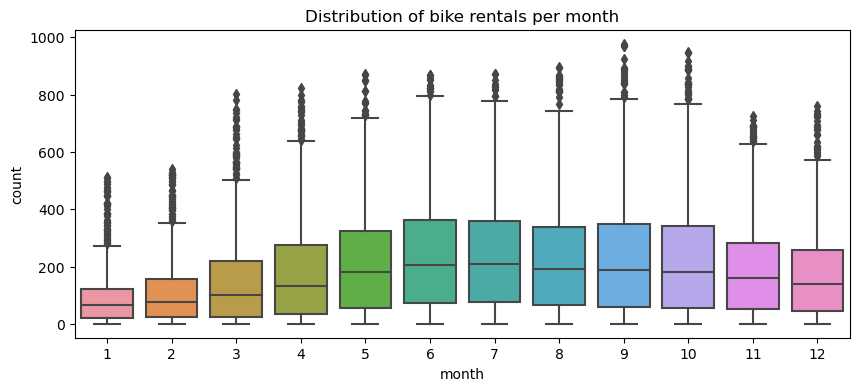

In [37]:
plt.figure(figsize=(10,4))
sns.boxplot(x='month', y='count', data=train)
plt.title('Distribution of bike rentals per month')
plt.show()

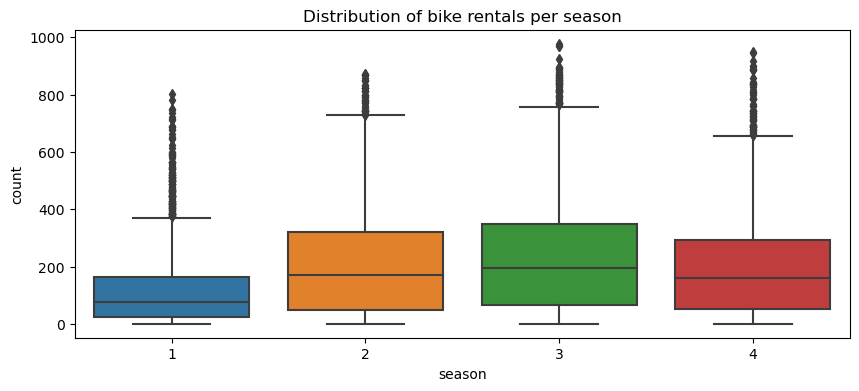

In [38]:
#season_1: spring, season_2: summer, season_3: fall, season_4: winter
plt.figure(figsize=(10,4))
sns.boxplot(x='season', y='count', data=train)
plt.title('Distribution of bike rentals per season')
plt.show()

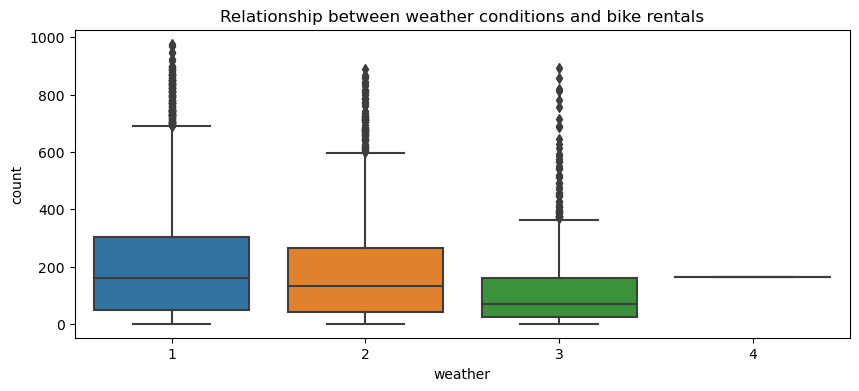

In [39]:
plt.figure(figsize=(10,4))
sns.boxplot(x='weather', y='count', data=train)
plt.title('Relationship between weather conditions and bike rentals')
plt.show()

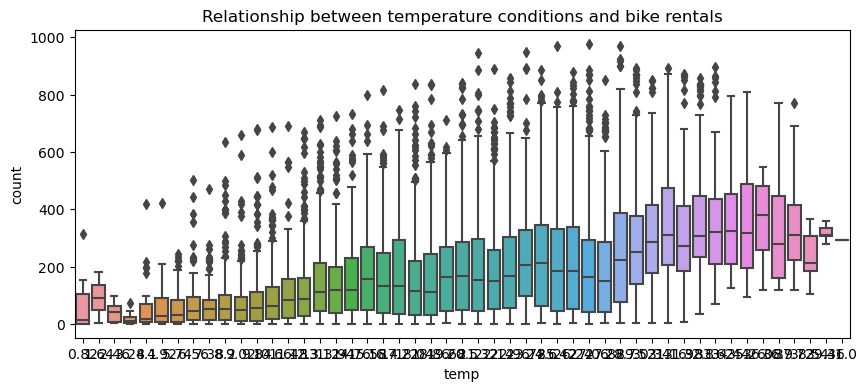

In [40]:
plt.figure(figsize=(10,4))
sns.boxplot(x='temp', y='count', data=train)
plt.title('Relationship between temperature conditions and bike rentals')
plt.show()

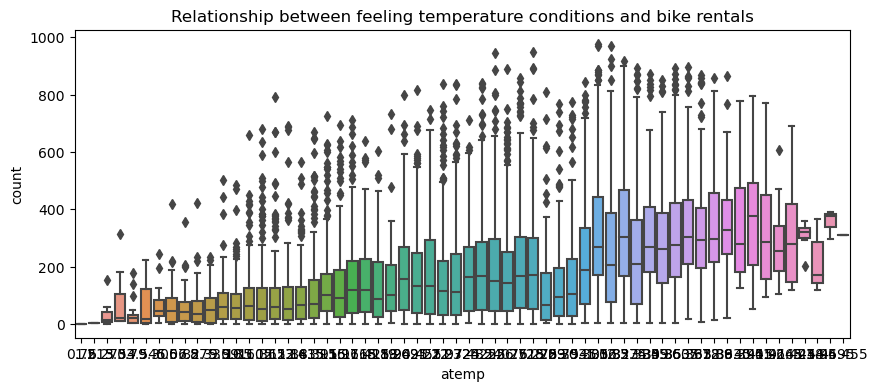

In [41]:
plt.figure(figsize=(10,4))
sns.boxplot(x='atemp', y='count', data=train)
plt.title('Relationship between feeling temperature conditions and bike rentals')
plt.show()

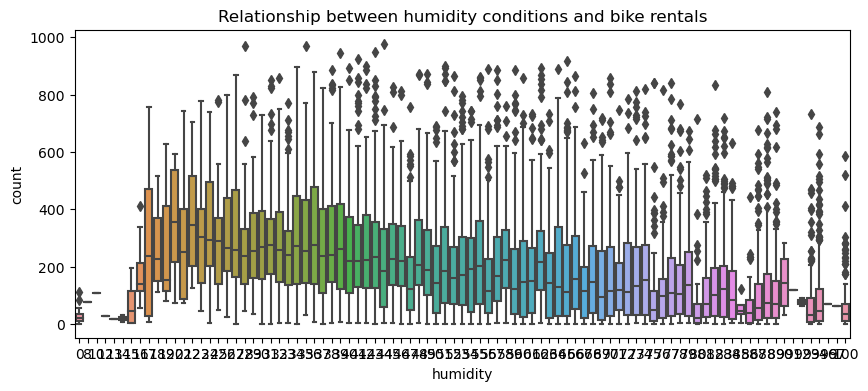

In [42]:
plt.figure(figsize=(10,4))
sns.boxplot(x='humidity', y='count', data=train)
plt.title('Relationship between humidity conditions and bike rentals')
plt.show()

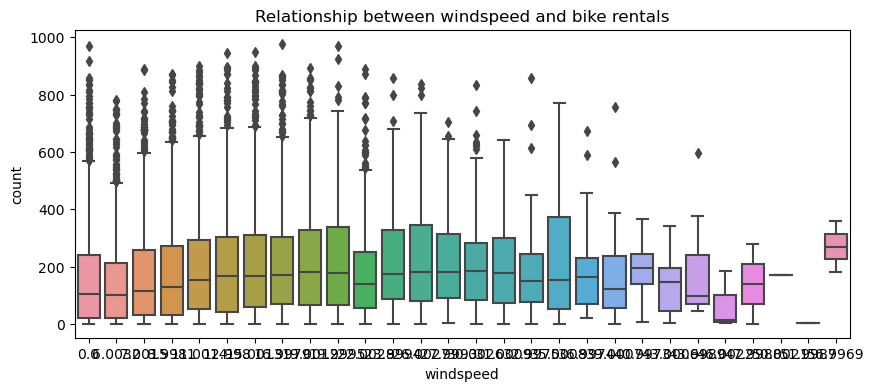

In [43]:
plt.figure(figsize=(10,4))
sns.boxplot(x='windspeed', y='count', data=train)
plt.title('Relationship between windspeed and bike rentals')
plt.show()

## Make category types so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [11]:
train = pd.get_dummies(train, columns=['season'], dtype='category')
train = pd.get_dummies(train, columns=['weather'], dtype='category')

test_ = pd.get_dummies(test, columns=['season'], dtype='category')
test= pd.get_dummies(test, columns=['weather'], dtype='category')

In [12]:
test= pd.get_dummies(test, columns=['season'], dtype='category')

In [13]:
test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,month,day,hour,day_of_week,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,0,1,10.66,11.365,56,26.0027,1,20,0,Thursday,True,False,False,False,True,False,False,False
1,0,1,10.66,13.635,56,0.0000,1,20,1,Thursday,True,False,False,False,True,False,False,False
2,0,1,10.66,13.635,56,0.0000,1,20,2,Thursday,True,False,False,False,True,False,False,False
3,0,1,10.66,12.880,56,11.0014,1,20,3,Thursday,True,False,False,False,True,False,False,False
4,0,1,10.66,12.880,56,11.0014,1,20,4,Thursday,True,False,False,False,True,False,False,False


In [14]:
# View are new feature
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,month,day,hour,day_of_week,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,16,1,1,0,Saturday,True,False,False,False,True,False,False,False
1,0,0,9.02,13.635,80,0.0,40,1,1,1,Saturday,True,False,False,False,True,False,False,False
2,0,0,9.02,13.635,80,0.0,32,1,1,2,Saturday,True,False,False,False,True,False,False,False
3,0,0,9.84,14.395,75,0.0,13,1,1,3,Saturday,True,False,False,False,True,False,False,False
4,0,0,9.84,14.395,75,0.0,1,1,1,4,Saturday,True,False,False,False,True,False,False,False


array([[<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>]], dtype=object)

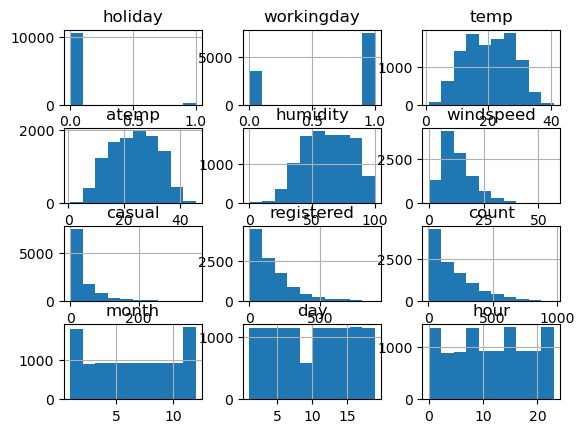

In [65]:
# View histogram of all features again now with the hour feature
train.hist()

## Create new feature

In [15]:
# Define a function to determine if a given hour is typically a rush hour
def is_rush_hour(hour):
    if (7 <= hour <= 9) or (17 <= hour <= 19):
        return 1
    else:
        return 0

In [16]:
# Create rush_hour feature
train['rush_hour'] = train['hour'].apply(is_rush_hour)
test['rush_hour'] = test['hour'].apply(is_rush_hour)

In [17]:
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,month,day,hour,day_of_week,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,rush_hour
0,0,0,9.84,14.395,81,0.0,16,1,1,0,Saturday,True,False,False,False,True,False,False,False,0
1,0,0,9.02,13.635,80,0.0,40,1,1,1,Saturday,True,False,False,False,True,False,False,False,0
2,0,0,9.02,13.635,80,0.0,32,1,1,2,Saturday,True,False,False,False,True,False,False,False,0
3,0,0,9.84,14.395,75,0.0,13,1,1,3,Saturday,True,False,False,False,True,False,False,False,0
4,0,0,9.84,14.395,75,0.0,1,1,1,4,Saturday,True,False,False,False,True,False,False,False,0


## Step 5: Rerun the model with the same settings as before, just with more features

In [75]:
predictor_new_features = TabularPredictor(label='count', problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train,
    time_limit=300,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20231210_190551"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 300 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20231210_190551/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 86 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 214 seconds.
Starting full fit now with num_stack_level

In [76]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -54.252913  root_mean_squared_error       3.201244  186.778511                0.002635           0.527155            3       True          9
1         CatBoost_BAG_L2  -54.858790  root_mean_squared_error       1.996338  150.983525                0.064698          23.703231            2       True          8
2  RandomForestMSE_BAG_L2  -54.892239  root_mean_squared_error       3.133912  162.548126                1.202271          35.267832            2       True          7
3     WeightedEnsemble_L2  -55.826859  root_mean_squared_error       1.020635  117.877454                0.000923           0.266190            2       True          6
4         CatBoost_BAG_L1  -56.193855  root_mean_squared_error       0.120770  100.386753         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.93326033133259,
  'KNeighborsDist_BAG_L1': -119.36560130583281,
  'RandomForestMSE_BAG_L1': -61.849108286680945,
  'CatBoost_BAG_L1': -56.19385543867304,
  'ExtraTreesMSE_BAG_L1': -62.5101197759772,
  'WeightedEnsemble_L2': -55.82685856168306,
  'RandomForestMSE_BAG_L2': -54.892239065863535,
  'CatBoost_BAG_L2': -54.85879011821844,
  'WeightedEnsemble_L3': -54.25291263591266},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif

In [77]:
# Predict on the evaluation set
second_model_predictions = predictor_new_features.predict(test)

# Remember to set all negative values to zero
second_model_predictions = second_model_predictions.apply(lambda x: max(0, x))

In [78]:
# Same submitting predictions
submission["count"] = second_model_predictions
submission.to_csv("submission_new_features-i2.csv", index=False)

In [79]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "second new features"

100%|█████████████████████████████████████████| 242k/242k [00:00<00:00, 459kB/s]
Successfully submitted to Bike Sharing Demand

In [80]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-12-10 19:11:34  second new features                complete  0.50318      0.50318       
submission.csv               2023-12-10 18:49:39  second raw submission              complete  1.32965      1.32965       
submission_new_hpo.csv       2023-12-08 20:20:21  new features with hyperparameters  complete  1.2746       1.2746        
submission_new_hpo.csv       2023-12-07 16:48:17  new features with hyperparameters  complete  1.2746       1.2746        


#### New Score of 0.50

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [18]:
nn_options = {  
    'num_epochs': [5,10],  # number of training epochs (controls training time of NN models)
    'activation': ['relu', 'softrelu', 'tanh'],  # activation function used in NN (categorical hyperparameter, default = first entry)
}

gbm_options = { 
    'num_boost_round': [50,100],  # number of boosting rounds (controls training time of GBM models)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options
                  }
time_limit = 300
num_trials = 3 # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto' 

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'searcher': search_strategy,
    'scheduler' : 'local',
}

In [22]:
predictor_new_hpo = TabularPredictor(label='count', problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train,
    time_limit=800,
    #hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    presets="best_quality")

No model was trained during hyperparameter tuning NeuralNetTorch_r89_BAG_L1... Skipping this model.
Fitting model: WeightedEnsemble_L2 ... Training model for up to 32.69s of the -694.57s of remaining time.
	Ensemble Weights: {'RandomForest_r195_BAG_L1': 0.704, 'ExtraTrees_r42_BAG_L1': 0.296}
	-60.5878	 = Validation score   (-root_mean_squared_error)
	1.63s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 106 L2 models ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 32.69s of the -697.39s of remaining time.
	Ensemble Weights: {'RandomForest_r195_BAG_L1': 0.704, 'ExtraTrees_r42_BAG_L1': 0.296}
	-60.5878	 = Validation score   (-root_mean_squared_error)
	0.87s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 731.49s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20231210_193307")


In [23]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -60.587829  root_mean_squared_error       0.001045  32.465091                0.000567           0.874617            3       True         30
1        WeightedEnsemble_L2  -60.587829  root_mean_squared_error       0.001338  33.217441                0.000860           1.626966            2       True         29
2   RandomForest_r195_BAG_L1  -60.857073  root_mean_squared_error       0.000325  17.640942                0.000325          17.640942            1       True          8
3     RandomForestMSE_BAG_L1  -61.849108  root_mean_squared_error       0.000173  32.764563                0.000173          32.764563            1       True          3
4    RandomForest_r16_BAG_L1  -61.849108  root_mean_squared_error       0.000188  21.136

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_r33_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'ExtraTrees_r42_BAG_L1': 'StackerEnsembleModel_XT',
  'RandomForest_r195_BAG_L1': 'StackerEnsembleModel_RF',
  'XGBoost_r89_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_r194_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'ExtraTrees_r172_BAG_L1': 'StackerEnsembleModel_XT',
  'RandomForest_r39_BAG_L1': 'StackerEnsembleModel_RF',
  'XGBoost_r98_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'ExtraTrees_r49_BAG_L1': 'StackerEnsembleModel_XT',
  'RandomForest_r127_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForest_r34_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTrees_r4_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_r49_BAG_L1': 'StackerEnsembleModel

In [24]:
# Predict on the evaluation set
third_model_predictions = predictor_new_hpo.predict(test)

# Remember to set all negative values to zero
third_model_predictions = third_model_predictions.apply(lambda x: max(0, x))

In [25]:
# Same submitting predictions
submission["count"] = third_model_predictions
submission.to_csv("submission_new_hpo-i2.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "second new features with hyperparameters"

100%|█████████████████████████████████████████| 243k/243k [00:00<00:00, 451kB/s]
Successfully submitted to Bike Sharing Demand

In [27]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                               status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-12-10 19:58:11  second new features with hyperparameters  complete  1.2746       1.2746        
submission_new_features.csv  2023-12-10 19:11:34  second new features                       complete  0.50318      0.50318       
submission.csv               2023-12-10 18:49:39  second raw submission                     complete  1.32965      1.32965       
submission_new_hpo.csv       2023-12-08 20:20:21  new features with hyperparameters         complete  1.2746       1.2746        


#### New Score of 1.27

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

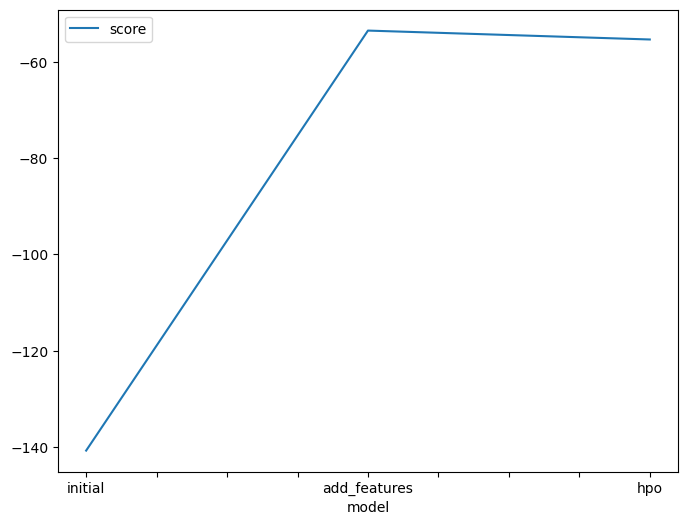

In [70]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-140.72, -53.50, -55.35]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

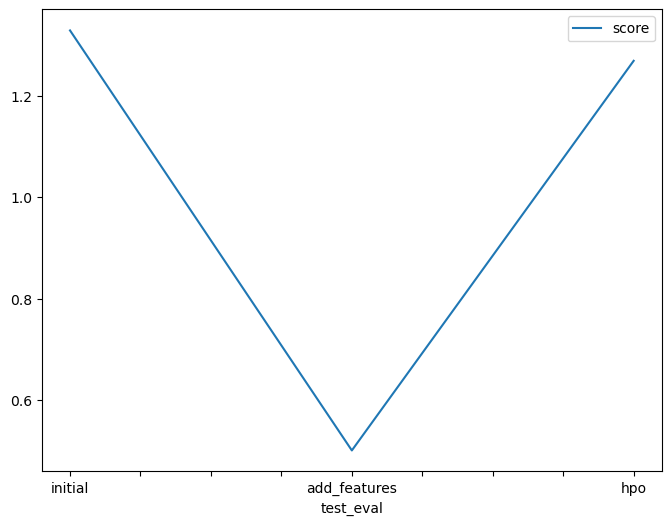

In [69]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.33, 0.50, 1.27]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "algorithm": ["Weighted Ensemble L3", "Weighted Ensemble L3", "Weighted Ensemble L2"],
    "hpo1": ["use_orig_features:False", "use_orig_features:False", "use_orig_features:False"],
    "hpo2": ["max_base_models: 25", "max_base_models: 25", "max_base_models: 25"],
    "hpo3": ["max_base_models_per_type': 5", "max_base_models_per_type': 5", "max_base_models_per_type: 5"],
    "hpo4": ["save_bag_folds: True", "save_bag_folds: True", "save_bag_folds: True"],
    "score": [1.33, 0.50, 1.27]
})